In [2]:
#Importing basic packages and reading the data rom excel sheet
import pandas as pd
import numpy as np 

df = pd.read_excel("data_Uniform.xlsx")

print(df.head())
print(df.shape)


         obs
0  54.507318
1  52.183131
2  59.587585
3  52.951728
4  53.302821
(51, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

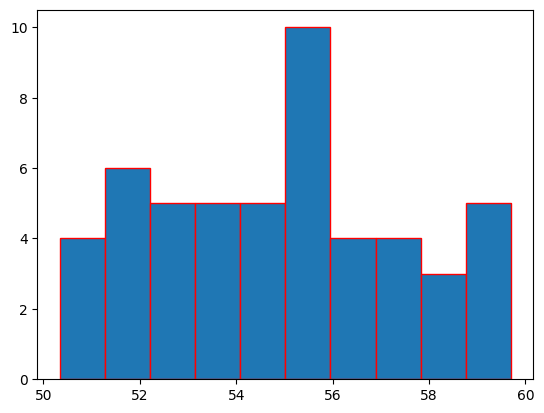

In [4]:
#let's visualize the data as a histogram
import matplotlib.pyplot as plt

plt.hist(df['obs'], edgecolor= "red")
plt.show

In [5]:
#Let's get the descriptive statistics for the data
df.describe()

,obs
count,51.000000
mean,54.931441
std,2.633428
min,50.340227
25%,52.979121
50%,55.079462
75%,56.820487
max,59.695597


In [7]:
#additional descriptive statistics
stats_labels = ['Varince observed', 'Skwe observed', 'Kurt observed']
stats_values = [round(df['obs'].var(), 2), round(df['obs'].skew(), 2), round(df['obs'].kurt(), 2)]

print(set(zip(stats_labels, stats_values)))

{('Kurt observed', np.float64(-0.83)), ('Skwe observed', np.float64(0.18)), ('Varince observed', np.float64(6.93))}


In [9]:
#Importing the required statistical packages
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, uniform, poisson
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chisquare
from scipy.stats import chi2

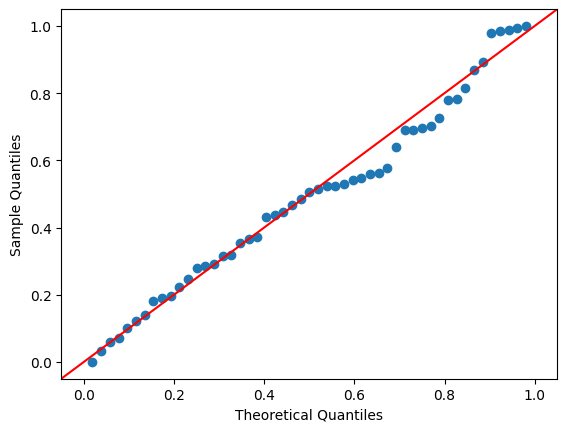

In [18]:
# Develping a q-q plot to compare the qualities - amplify the differences in the tails
sm.qqplot(df['obs'], stats.uniform, fit=True, line="45")
plt.show()

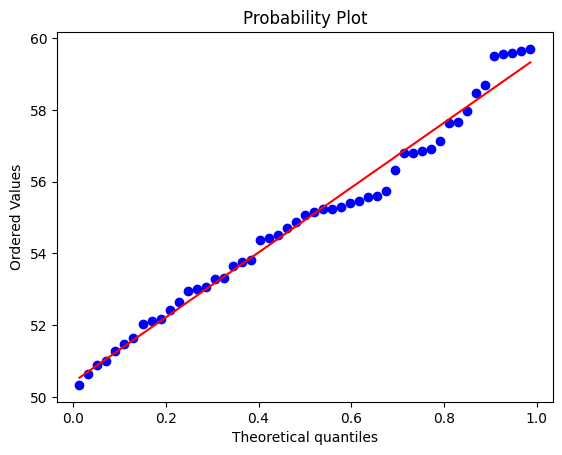

In [16]:
#p-p plot to amplify the differences in center
stats.probplot(df['obs'], dist='uniform', plot=plt)
plt.show()

In [19]:
#step-1 in chi-square GOF - Create bins
df['Bins'] = pd.cut(df['obs'], bins=10)
print(df)

          obs              Bins
0   54.507318  (54.082, 55.018]
1   52.183131  (51.276, 52.211]
2   59.587585   (58.76, 59.696]
3   52.951728  (52.211, 53.147]
4   53.302821  (53.147, 54.082]
5   54.383157  (54.082, 55.018]
6   55.394090  (55.018, 55.953]
7   59.637172   (58.76, 59.696]
8   53.811463  (53.147, 54.082]
9   52.035259  (51.276, 52.211]
10  53.763910  (53.147, 54.082]
11  59.488890   (58.76, 59.696]
12  56.798223  (55.953, 56.889]
13  55.727858  (55.018, 55.953]
14  54.434550  (54.082, 55.018]
15  55.162684  (55.018, 55.953]
16  51.287706  (51.276, 52.211]
17  54.884016  (54.082, 55.018]
18  50.340227  (50.331, 51.276]
19  51.009715  (50.331, 51.276]
20  53.006514  (52.211, 53.147]
21  52.653531  (52.211, 53.147]
22  56.323987  (55.953, 56.889]
23  51.467548  (51.276, 52.211]
24  56.900738  (56.889, 57.825]
25  58.482138   (57.825, 58.76]
26  57.659965  (56.889, 57.825]
27  57.974599   (57.825, 58.76]
28  52.115398  (51.276, 52.211]
29  55.079462  (55.018, 55.953]
30  50.6

In [22]:
#step-2 count the number of observations in each bin
df_2 = pd.DataFrame()
df_2["Observed Frequency"] = (df.groupby('Bins').count())
df_2

C:\Users\kethi\AppData\Local\Temp\ipykernel_56272\2840334772.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2["Observed Frequency"] = (df.groupby('Bins').count())


,Observed Frequency
Bins,
"(50.331, 51.276]",4
"(51.276, 52.211]",6
"(52.211, 53.147]",5
"(53.147, 54.082]",5
"(54.082, 55.018]",5
"(55.018, 55.953]",10
"(55.953, 56.889]",4
"(56.889, 57.825]",4
"(57.825, 58.76]",3


In [23]:
#step - 3 in chi-square GOF is to determine the expected number of observations in each bin
mean = df_2["Observed Frequency"].mean()
df_2["Expected Frequency"] = mean
df_2

,Observed Frequency,Expected Frequency
Bins,,
"(50.331, 51.276]",4,5.1
"(51.276, 52.211]",6,5.1
"(52.211, 53.147]",5,5.1
"(53.147, 54.082]",5,5.1
"(54.082, 55.018]",5,5.1
"(55.018, 55.953]",10,5.1
"(55.953, 56.889]",4,5.1
"(56.889, 57.825]",4,5.1
"(57.825, 58.76]",3,5.1


In [ ]:
#step-4A is to determine the test Statistic and P-value
chisquare(df_2["Observed Frequency"], df_2["Expected Frequency"])

Power_divergenceResult(statistic=np.float64(6.450980392156864), pvalue=np.float64(0.694070359758001))

In [ ]:
#GUIDE FOR INFERENCE IF CONCLUSION IS GOING TO BE BASED ON STEP-4A

# REJECT the Null if the p-value < level of significant
# DO NOT REJECT the Null if the p-value >= level of significant

# Say the level of significance is 5%, then for given data set, p-value (0.694)>>0.05 --> DO NOT REJECT THE NULL

# Note: For any level of significance ~>70%, we do not reject the null for the current data set. 

In [25]:
#Step-4B in CHi-Square GOF: Determine the Tabulated Value of the Test Statistic
chi2.ppf(0.95,len(df_2)-2-1)

# GUIDE FOR INFERENCE IF CONCLUSION IS GOING TO BE BASED ON STEP-4B

# REJECT the Null if the "Tabluated Test Statistic Value" < "Computed Test Statistic Value"
# DO NOT REJECT the Null if the "Tabluated Test Statistic Value" >= "Computed Test Statistic Value"


np.float64(14.067140449340167)